<a href="https://colab.research.google.com/github/c0991100247/onthejobtraining20250315/blob/main/12_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## add a header

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
225/225 - 9s - 39ms/step - accuracy: 0.4257 - loss: 2.2735 - val_accuracy: 0.5231 - val_loss: 1.7598
Epoch 2/12
225/225 - 4s - 19ms/step - accuracy: 0.5534 - loss: 1.7041 - val_accuracy: 0.6055 - val_loss: 1.5491
Epoch 3/12
225/225 - 4s - 19ms/step - accuracy: 0.6120 - loss: 1.4718 - val_accuracy: 0.6294 - val_loss: 1.4546
Epoch 4/12
225/225 - 5s - 24ms/step - accuracy: 0.6527 - loss: 1.3248 - val_accuracy: 0.6483 - val_loss: 1.3924
Epoch 5/12
225/225 - 4s - 19ms/step - accuracy: 0.6884 - loss: 1.1817 - val_accuracy: 0.6811 - val_loss: 1.3515
Epoch 6/12
225/225 - 5s - 23ms/step - accuracy: 0.7173 - loss: 1.0678 - val_accuracy: 0.6928 - val_loss: 1.3235
Epoch 7/12
225/225 - 4s - 17ms/step - accuracy: 0.7402 - loss: 0.9690 - val_accuracy: 0.6945 - val_loss: 1.2996
Epoch 8/12
225/225 - 4s - 18ms/step - accuracy: 0.7598 - loss: 0.8994 - val_accuracy: 0.7028 - val_loss: 1.2999
Epoch 9/12
225/225 - 5s - 23ms/step - accuracy: 0.7730 - loss: 0.8558 - val_accuracy: 0.7112 - val_loss:

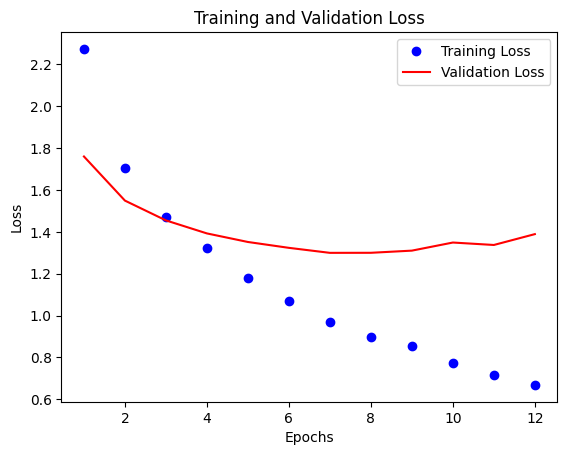

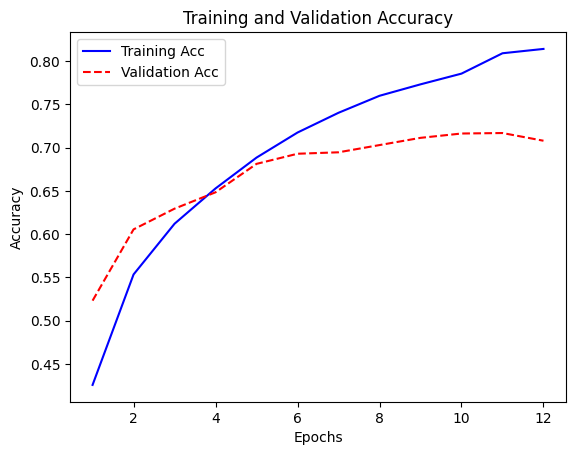

In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

seed = 10
np.random.seed(seed)  # 指定亂數種子
# 載入Reuters資料集
top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(
                                       num_words=top_words)
# 資料預處理
max_words = 200
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# One-hot編碼
Y_train = to_categorical(Y_train, 46)
Y_test = to_categorical(Y_test, 46)
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.75))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(46, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
          epochs=12, batch_size=32, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()